## <center> Python Geospatial Data Analysis

### <center>Instructor: Vinita Silaparasetty

### Import Libraries

[folium](https://python-visualization.github.io/folium/modules.html)

In [1]:
import pandas as pd
import folium
import math
from folium.plugins import MarkerCluster,HeatMap
import seaborn as sns

### Import Data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/VinitaSilaparasetty/coursera-spatial-data-analysis/master/boston-crime%202.csv')
df.head(3)

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
0      I192082859           724         Auto Theft   
1      I192082751           724         Auto Theft   
2      I192082680           727         Auto Theft   

                  OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  SHOOTING  \
0                          AUTO THEFT      E18            519       NaN   
1                          AUTO THEFT      E18            493       NaN   
2  AUTO THEFT - LEASED/RENTED VEHICLE      D14            794       NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART  \
0  2019-10-13 09:28:24  2019     10      Sunday     9  Part One   
1  2019-10-12 20:11:26  2019     10    Saturday    20  Part One   
2  2019-10-12 15:12:43  2019     10    Saturday    15  Part One   

             STREET        Lat       Long                     Location  \
0        LINCOLN ST  42.259518 -71.121563  (42.25951765, -71.12156299)   
1  METROPOLITAN AVE  42.262092 -71.116710  (42.26209214, -71.11670964)   
2        ALLSTON ST  42.352375 -71.135096  (42.35237455, -71.13509584)   

         Date      Time  
0  2019-10-13  09:28:24  
1  2019-10-12  20:11:26  
2  2019-10-12  15:12:43

### Generate Base Map

In [19]:
m = folium.Map(location = boston , title = "Steam Terrain" , zoom_start = 12)
m

**Experiments:**

In [7]:
boston = (42.348443 , -71.05977)
m = folium.Map(location = boston , title = "Steam Terrain")
m

### Mark Crime Scenes

In [11]:
mc = MarkerCluster()

for idx,row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(folium.Marker([row['Lat'] , row['Long']]))
        # In another folium versions is 'Marker' instead of 'folium.Marker'
m.add_child(mc)

**Experiments:**

In [31]:
mc = MarkerCluster()

In [37]:
for idx,row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        print(str(idx) + " "+ str(row['Long']) + "   " + str(row['Lat']))

0 -71.12156299   42.25951765
1 -71.11670964   42.26209214
2 -71.13509584   42.35237455
3 -71.0764015   42.34947586
4 -71.06655134   42.38184582
5 -71.09246318   42.2779637
6 -71.06586347   42.36769032
7 -71.07244098   42.2918158
8 -71.07244098   42.2918158
9 -71.07501315   42.33241896
10 -71.03647779   42.37339168
11 -71.06319318   42.36433126
12 -71.06319318   42.36433126
13 -71.12579957   42.28861715
14 -71.0926152   42.31462973
15 -71.09349553   42.2836283
16 -71.0752731   42.28757867
17 -71.08763245   42.2857651
18 -71.07341982   42.31193478
19 -71.0810356   42.31785924
20 -71.07001038   42.28606484
21 -71.0527942   42.34006986
22 -71.08381263   42.27967492
23 -71.06258333   42.35594239
24 -71.03341969   42.38258915
25 -71.0280821   42.3791237
26 -71.0280821   42.3791237
27 -71.12927406   42.35272466
28 -71.15158388   42.3384014
29 -71.08117746   42.34403563
30 -71.06213513   42.35637531
31 -71.1173443   42.27868789
32 -71.15642795   42.3390647
33 -71.05467933   42.34128751
34 -71.

In [39]:
for idx,row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(folium.Marker([row['Lat'] , row['Long']]))
mc

In [40]:
df.iterrows()

<generator object DataFrame.iterrows at 0x0000020028F78BA0>

### View Districts with Highest Crime Rates

In [12]:
crime = df.groupby(['DISTRICT' , 'STREET' , 'REPORTING_AREA' , 'Lat' , 'Long']).sum().reset_index()

In [13]:
crime.update(crime['DISTRICT'].map('District:{}'.format))
crime.update(crime['REPORTING_AREA'].map('Reports:{}'.format))

In [50]:
m2 = folium.Map(location = boston , tiles = 'Stamentoner' , zoom_start = 12)
HeatMap(data = crime[['Lat' , 'Long']] , radius = 15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location = [point.Lat , point.Long]
                       ,radius = 5
                       ,weight = 2
                       ,popup = [point.DISTRICT , point.REPORTING_AREA]
                       ,fill_color = '#000000').add_to(m2)
crime.apply(plotDot , axis = 1)
m2.fit_bounds(m2.get_bounds())
m2

**Experiments:**

**tiles (str, default 'OpenStreetMap')** – Map tileset to use. Can choose from a list of built-in tiles, pass a custom URL or pass None to create a map without tiles. For more advanced tile layer options, use the TileLayer class.

In [43]:
crime = df.groupby(['DISTRICT' , 'STREET' , 'REPORTING_AREA' , 'Lat' , 'Long']).sum().reset_index()
crime.head()

DISTRICT        STREET REPORTING_AREA        Lat       Long  OFFENSE_CODE  \
0       A1  ARLINGTON ST            128  42.348670 -71.069389          3201   
1       A1  ATLANTIC AVE            110  42.354009 -71.052853          3831   
2       A1  ATLANTIC AVE            114  42.354383 -71.052133          2647   
3       A1   CAUSEWAY ST             75  42.364331 -71.063193          1825   
4       A1   CAUSEWAY ST             75  42.364975 -71.062044          2405   

   SHOOTING  YEAR  MONTH  HOUR  
0       0.0  2019      9    10  
1       0.0  2019      9     3  
2       0.0  2019      9    15  
3       0.0  4038     18     8  
4       0.0  2019      9    21

In [44]:
crime.update(crime['DISTRICT'].map('District:{}'.format))
crime.update(crime['REPORTING_AREA'].map('Reports:{}'.format))
crime.head()

DISTRICT        STREET REPORTING_AREA        Lat       Long  \
0  District:A1  ARLINGTON ST    Reports:128  42.348670 -71.069389   
1  District:A1  ATLANTIC AVE    Reports:110  42.354009 -71.052853   
2  District:A1  ATLANTIC AVE    Reports:114  42.354383 -71.052133   
3  District:A1   CAUSEWAY ST     Reports:75  42.364331 -71.063193   
4  District:A1   CAUSEWAY ST     Reports:75  42.364975 -71.062044   

   OFFENSE_CODE  SHOOTING  YEAR  MONTH  HOUR  
0          3201       0.0  2019      9    10  
1          3831       0.0  2019      9     3  
2          2647       0.0  2019      9    15  
3          1825       0.0  4038     18     8  
4          2405       0.0  2019      9    21

In [47]:
# Changing raius in HeatMap
m2 = folium.Map(location = boston , tiles = 'Stamentoner' , zoom_start = 12)
HeatMap(data = crime[['Lat' , 'Long']] , radius = 5).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location = [point.Lat , point.Long]
                       ,radius = 5
                       ,weight = 2
                       ,popup = [point.DISTRICT , point.REPORTING_AREA]
                       ,fill_color = '#000000').add_to(m2)
crime.apply(plotDot , axis = 1)
m2.fit_bounds(m2.get_bounds())
m2

In [51]:
# Changing raius in CircleMarker
m2 = folium.Map(location = boston , tiles = 'Stamentoner' , zoom_start = 12)
HeatMap(data = crime[['Lat' , 'Long']] , radius = 15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location = [point.Lat , point.Long]
                       ,radius = 10
                       ,weight = 2
                       ,popup = [point.DISTRICT , point.REPORTING_AREA]
                       ,fill_color = '#000000').add_to(m2)
crime.apply(plotDot , axis = 1)
m2.fit_bounds(m2.get_bounds())
m2

In [54]:
# Changing weight in HeatMap
m2 = folium.Map(location = boston , tiles = 'Stamentoner' , zoom_start = 12)
HeatMap(data = crime[['Lat' , 'Long']] , radius = 15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location = [point.Lat , point.Long]
                       ,radius = 5
                       ,weight = 10
                       ,popup = [point.DISTRICT , point.REPORTING_AREA]
                       ,fill_color = '#000000').add_to(m2)
crime.apply(plotDot , axis = 1)
m2.fit_bounds(m2.get_bounds())
m2

In [62]:
# Changing weight in CircleMarker
m2 = folium.Map(location = boston , tiles = 'Stamentoner' , zoom_start = 12)
HeatMap(data = crime[['Lat' , 'Long']] , radius = 15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location = [point.Lat , point.Long]
                       ,radius = 5
                       ,weight = 10
                       ,popup = [point.DISTRICT , point.REPORTING_AREA]
                       ,fill_color = '#000000').add_to(m2)
crime.apply(plotDot , axis = 1)
m2.fit_bounds(m2.get_bounds())
m2

In [63]:
# Changing color in CircleMarker
m2 = folium.Map(location = boston , tiles = 'Stamentoner' , zoom_start = 12)
HeatMap(data = crime[['Lat' , 'Long']] , radius = 15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location = [point.Lat , point.Long]
                       ,radius = 5
                       ,weight = 2
                       ,popup = [point.DISTRICT , point.REPORTING_AREA]
                       ,fill_color = '#ED2509').add_to(m2)
crime.apply(plotDot , axis = 1)
m2.fit_bounds(m2.get_bounds())
m2

In [65]:
# Changing color in CircleMarker
m2 = folium.Map(location = boston , tiles = 'Stamentoner' , zoom_start = 12)
HeatMap(data = crime[['Lat' , 'Long']] , radius = 15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location = [point.Lat , point.Long]
                       ,radius = 5
                       ,weight = 2
                       ,popup = [point.DISTRICT , point.REPORTING_AREA]
                       ,fill_color = 'ED09E6').add_to(m2)
crime.apply(plotDot , axis = 1)
m2.fit_bounds(m2.get_bounds())
m2

### Medical Assistance Analysis

In [25]:
med = df.loc[df.OFFENSE_CODE_GROUP == 'Medical Assistance'][['Lat' , 'Long']]
med.Lat.fillna(0 , inplace = True)
med.Long.fillna(0 , inplace = True)
m6 = folium.Map(location = boston , tiles = 'openstreetmap' , zoom_start = 11)
HeatMap(data = med , radius = 16).add_to(m6)
m6

**Experiments:**

In [66]:
med.head()

Lat       Long
23  42.355942 -71.062583
53  42.307342 -71.105441
58  42.309692 -71.072859
73  42.341288 -71.054679
75  42.320778 -71.105538

### Crimes Commited

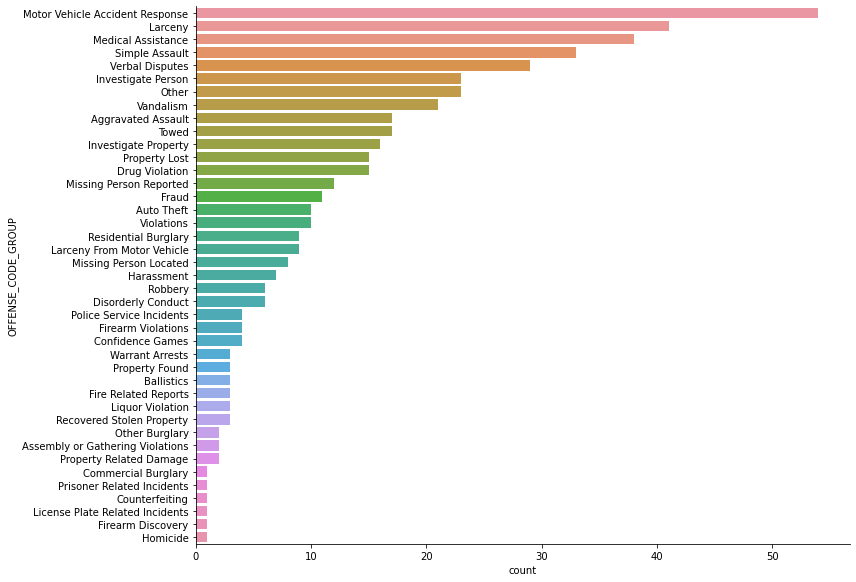

In [27]:
sns.catplot(y = 'OFFENSE_CODE_GROUP'
           ,kind = 'count'
           ,height = 8
           ,aspect = 1.5
           ,order = df.OFFENSE_CODE_GROUP.value_counts().index
           ,data = df)

**Experiments:**

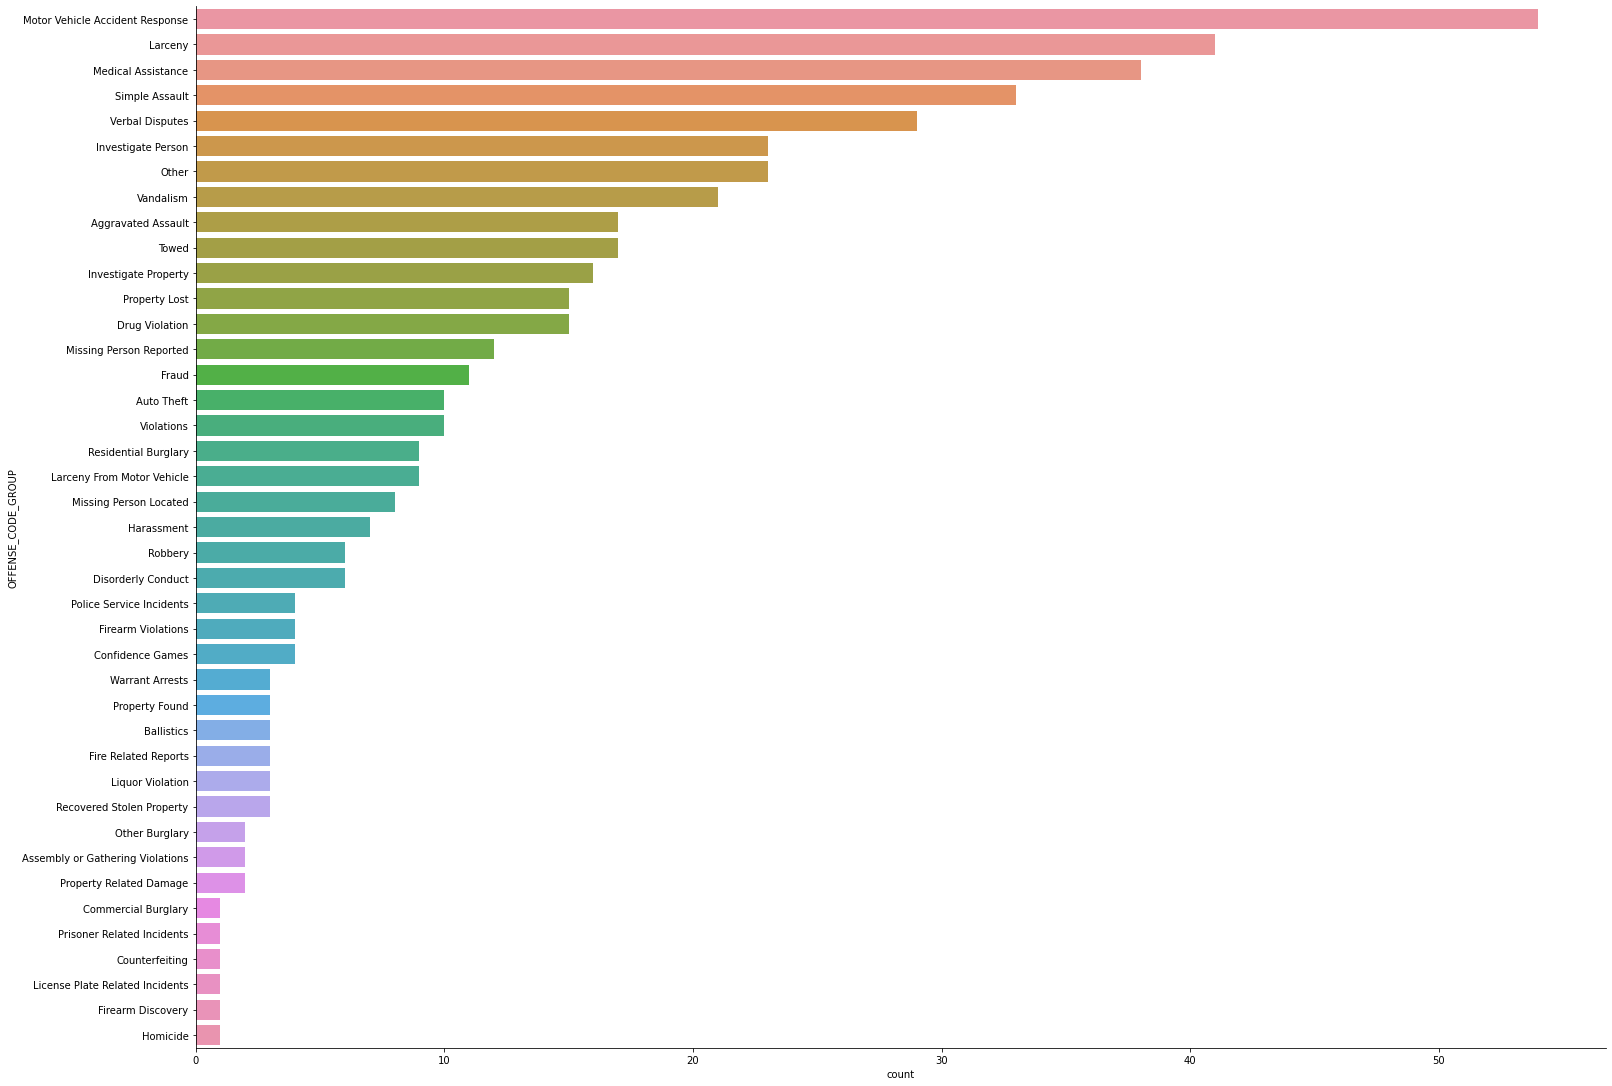

In [67]:
sns.catplot(y = 'OFFENSE_CODE_GROUP'
           ,kind = 'count'
           ,height = 15
           ,aspect = 1.5
           ,order = df.OFFENSE_CODE_GROUP.value_counts().index
           ,data = df)

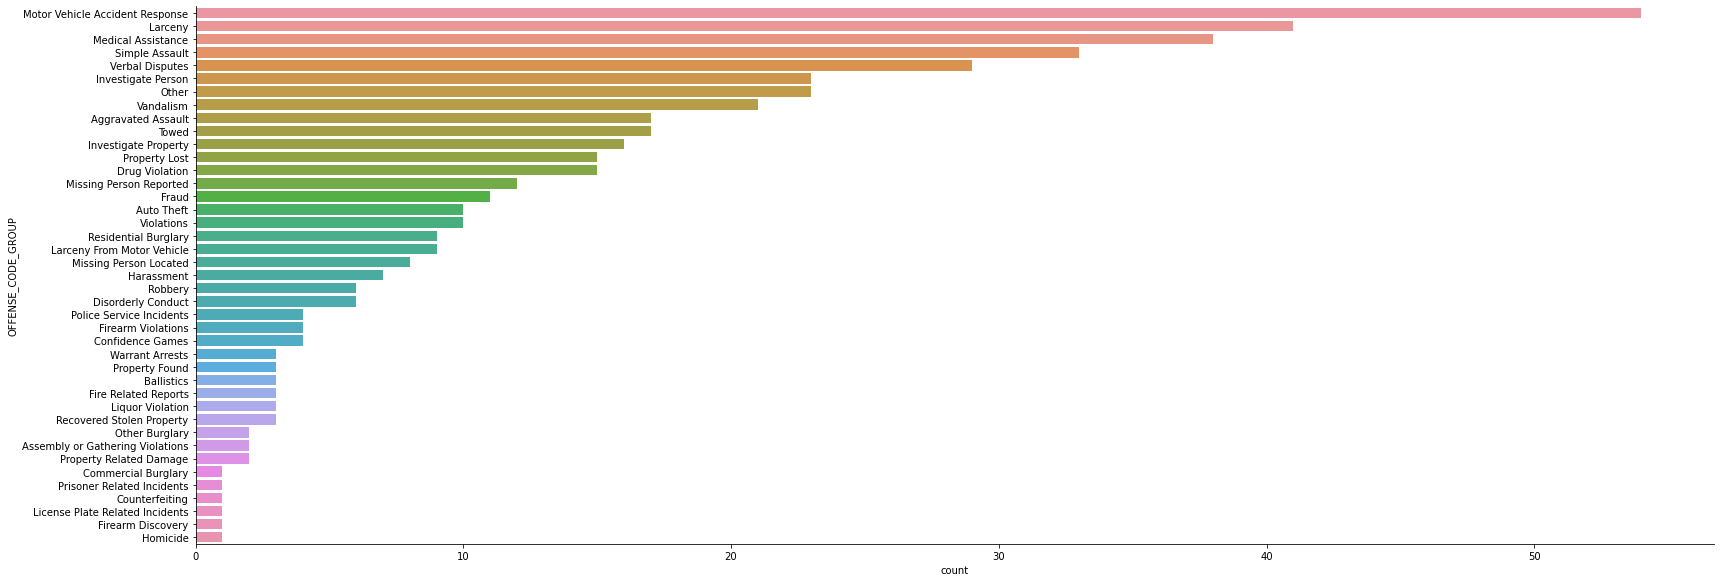

In [68]:
sns.catplot(y = 'OFFENSE_CODE_GROUP'
           ,kind = 'count'
           ,height = 8
           ,aspect = 3
           ,order = df.OFFENSE_CODE_GROUP.value_counts().index
           ,data = df)

### Motor Vehicle Accident Response

In [28]:
mv = df.loc[df.OFFENSE_CODE_GROUP == 'Motor Vehicle Accident Response'][['Lat','Long']]
mv.fillna(0 , inplace = True)
mv.Lat.fillna(0 , inplace = True)
mv.Long.fillna(0 , inplace = True)
m4 = folium.Map(location = boston , tiles = 'openstreetmap' , zoom_start = 11)
HeatMap(data = mv , radius = 16).add_to(m4)
m4
# Near by the heatest point in Brookford Street, there is a park "Wintrhop
# Pla

### Larceny

In [30]:
lar = df.loc[df.OFFENSE_CODE_GROUP == 'Larceny'][['Lat' , 'Long']]
lar.Lat.fillna(0 , inplace = True)
lar.Long.fillna(0 , inplace = True)
m5 = folium.Map(location = boston , tiles = 'openstreetmap' , zoom_start = 11)
HeatMap(data = lar , radius = 16).add_to(m5)
m5